In [81]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
import seaborn as sns


In [82]:
#referentiel base source
source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_entreprise.shape

C:\Users\chris\AppData\Local\Temp\ipykernel_9152\1604957516.py:2: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  source_entreprise=pd.read_csv('base_source_enrichie.csv', encoding='utf-8', sep=',', on_bad_lines='skip')


(7701, 364)

In [83]:
liste_siret=['84204731800014','84236050500015','37787010000023','37958790006692','37755024900041','84266569700012','84304782000025','84330826300014','84358782500012','84529824900028','84759322500018','84801266200013','84828705800012','84879272700028','84897073700021','85146192100013','85205318000018','85234625300010','87908786400028','88014940600014','31963279000857','31967982500194','32095539602633','32159106701390','32212091600208','95480206200032','95580206100106','95880580600014','95980195200018','97180186500033','31219677700014','31232697800037','31333485601684','31533401101434','31571121800265','31664317000392','31728838900529','31808311011182','31877162300200','31943832100055','32352844800042','32565471300420','32611850200201','32621613200018','32735998001799','32873036100016','32957085700865','33073077100590','33079298700027','33105740600067','33289973100035','33332163600586','33352059100095','33358346600052','33530956300096','33762184100903','33787946400143','33795345900506','33811273300278','33824631700642','33825308123562','33825313110992','33825323022013','33830238300041','33837545400216','33888018002237','33901245200084','33978830900781','34206914300085','34271560400019','34283741603023','34287940000139','34373826600083','34430738400778','34436631500440','34439409300175','34780600200023','34783527400015','34795123800869','34800644600234','34805816500104','34839062600292','34853430600033','34899155500353','34963839500021','34979735700010','35116448802465','35132272200064','35144208206081','35146649500063','35174572400200','35275120000606','35323852000749','35328606500084','34853430600033','34899155500353','34963839500021','34979735700010','35116448802465','35132272200064','35174572400200','35275120000606','35323852000749','35328606500084','37755024900041','37787010000023','37958790006692','38128962800343','38151585700377','38283726800392','38335951000807','38830198801470','38869820100752','39058913300086','39191815800620','39234308300052','39280453000021','39313529800502','39333946000023','39672031000137','39762454500109','39833035700862','39837922200084','39987725700044','40008953800203','40016563500600','40246802900077','40814067100152','41037911900010','41129846600011','41257562300019','41315730603183','41390176026595','30099068600572','30194021914572','30251015100020','30269561400354','30343501000010','30355924900238','30529134600123','30614003900182','30673168800108','30703572500174','30970699200281','31002648900081','31116059201555','31131532900848','32494775300020','33137600400056','33140593600013','33230365000011','33785014300013','33989948600023','38250700200022','38957398100013','40134278700017','42186374700026','43009052200011','43848797700029','44023766700025','44357144300037','44358237400049','45022831700019','45035132500037','45155629400010','45271628500021','48776678400093','49267753900016','49382608500018','51402313400026','51505194400053','52169352300032','52465923200010','52875561400013','53080177800016','55375040700080','78264442100029','79498636400014','80786887200019','81181672700028','35146649500063','30563503900194','30582329600077','30554661600049','84156372900018','84146699800025']

In [84]:
source_portfolio = source_entreprise[source_entreprise['banking_data_bdf_score'].isnull()!=True]

In [85]:
source_portfolio[['siren','company_name', 'ape_code']].head(20)

,siren,company_name,ape_code
31,492677539.0,BTF CONSULTING,4671Z
55,388301988.0,ESLC SERVICES,4671Z
81,553750407.0,COSTAMAGNA DISTRIBUTION,4673A
237,306140039.0,CAPELLI,4110A
244,339788309.0,VINCI IMMOBILIER PROMOTION,4110A
330,377550249.0,Wavestone,6202A
356,317288389.0,FIDUCIAL INFORMATIQUE,6202A
364,393135298.0,CS GROUP - France,6202A
420,398379222.0,ALITHYA FRANCE,6202A
750,782644421.0,BRASSERIE MAURO,4634Z


In [86]:
# Grouper par 'ape_code' et compter le nombre d'occurrences dans 'ape_name'
APE_portfolio = source_portfolio.groupby('ape_code')['ape_name'].count().sort_values(ascending=False)

# Afficher les 5 premiers résultats
print(APE_portfolio.head(10))

ape_code
4771Z    14
5629A     5
9511Z     4
5629B     4
6202A     4
4321A     4
8610Z     3
4642Z     3
6920Z     3
4511Z     3
Name: ape_name, dtype: int64


In [87]:
PME_source_portfolio = source_portfolio[(source_portfolio['type_ent'] == 'PME')]
ETI_source_portfolio = source_portfolio[(source_portfolio['type_ent'] == 'ETI')]
GE_source_portfolio = source_portfolio[(source_portfolio['type_ent'] == 'GE')]
TPEMIC_source_portfolio = source_portfolio[(source_portfolio['type_ent'] == 'TPE') | (source_portfolio['type_ent'] == 'microentreprise')]

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


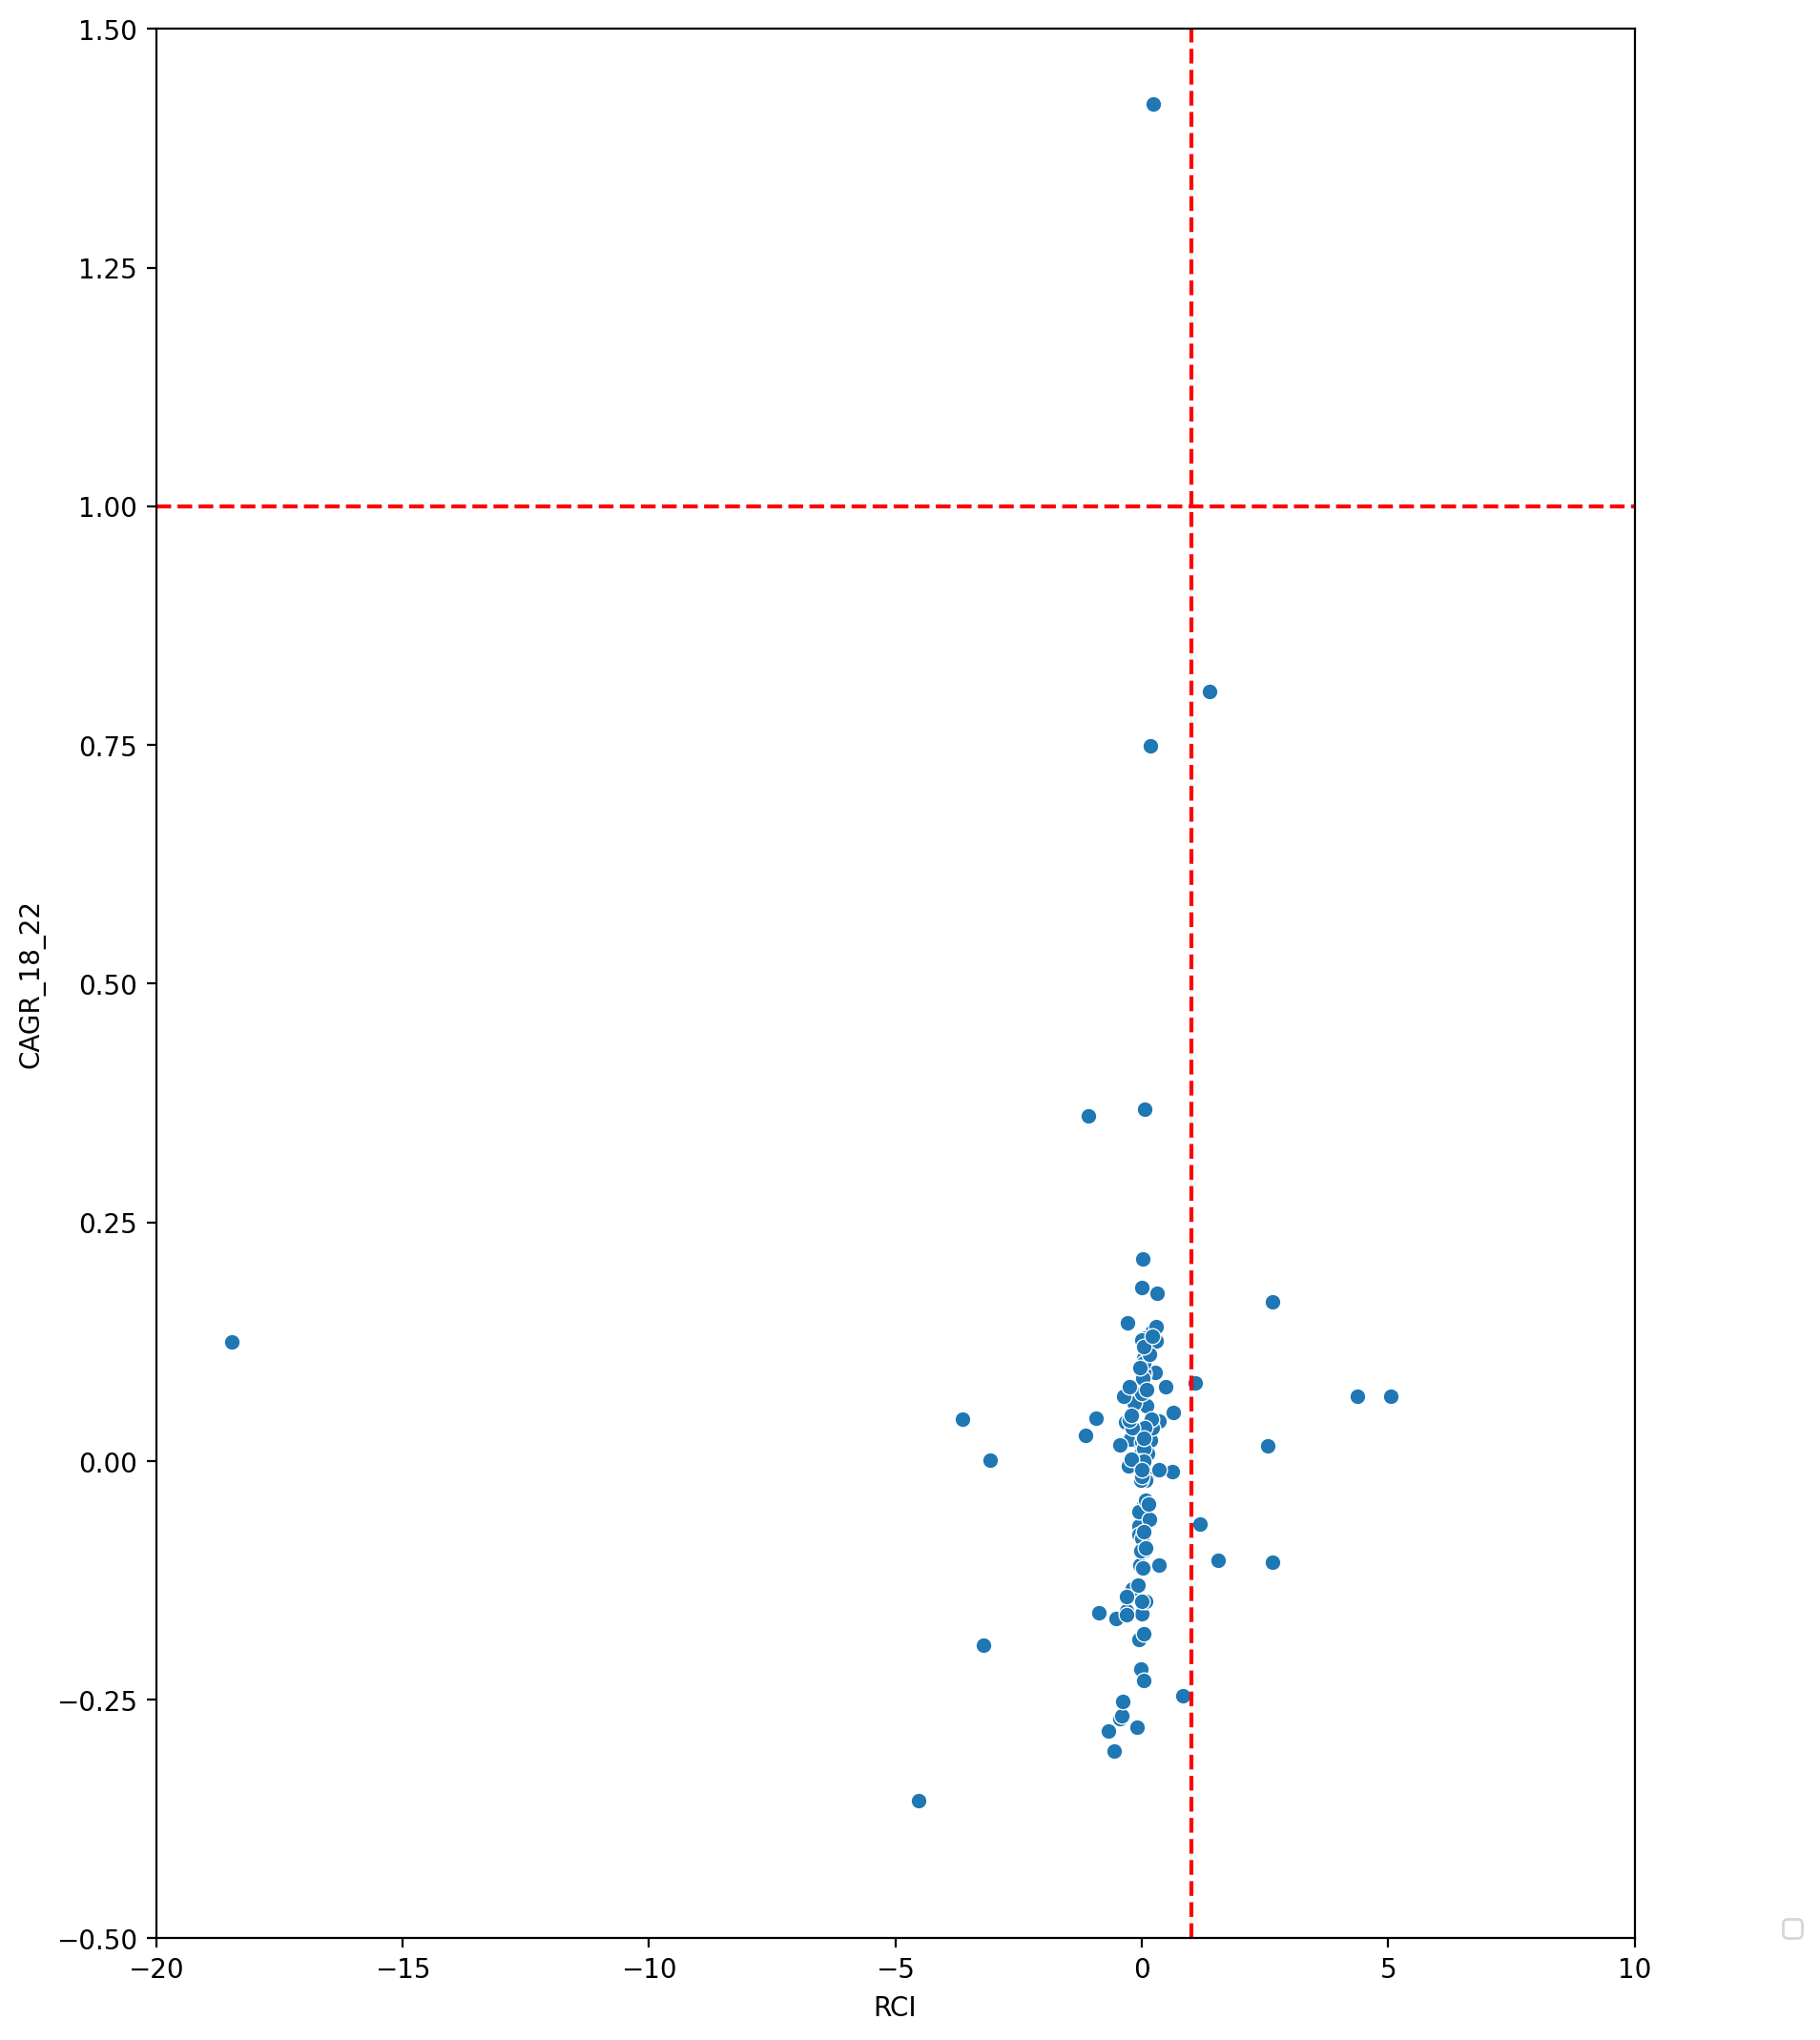

In [88]:
# nuage des entreprises de types PME 
plt.figure(figsize=(10,13),dpi=200)
ax=sns.scatterplot(x='RCI',y='CAGR_18_22',data=source_portfolio)
# La méthode legend() est appelée sur l'objet ax (qui représente les axes du graphique). 
# L'argument loc=(1.1, 0.5) spécifie l'emplacement de la légende par rapport au cadre du graphique, 
# où 1.1 décale la légende à droite du graphique (1 étant juste à la limite droite) 
# et 0.5 positionne la légende au milieu sur l'axe vertical.

ax.axvline(x=1, color='red', linestyle='--')
ax.set_xlim(-20,10)
ax.set_ylim(-0.5,1.5)
ax.axhline(y=1, color='red', linestyle='--')
ax.legend(loc=(1.1,0),fontsize=9)

In [89]:
RCIP_source_portfolio = source_portfolio[(source_portfolio['RCI'] > 1)]

In [90]:
RCIP_source_portfolio[['siren','company_name', 'revenue','RCI','CAGR_18_22']]

,siren,company_name,revenue,RCI,CAGR_18_22
330,377550249.0,Wavestone,3.251776e+08,4.379997,0.068007
420,398379222.0,ALITHYA FRANCE,8.288215e+06,25.937570,0.002945
1613,440237667.0,SAS HYPER GRASSE,1.053961e+08,1.080782,0.081502
1814,842665697.0,LAETIT'BE,6.834850e+04,1.542199,-0.103893
1864,400165635.0,SPRINGFIELD FRANCE,1.081203e+07,2.660618,-0.106262
1960,309706992.0,GINGER,4.361382e+07,12.542308,-0.093609
4116,377870100.0,CLINIQUE DES TROIS CYPRES,7.496248e+06,2.662383,0.167177
4300,848792727.0,PROVIDENCE ASSURANCES,7.580667e+04,1.370623,0.805915
6199,401342787.0,SAS FREMOND,5.537978e+05,2.562774,0.015894
7216,339899486.0,AROMATECH,2.383253e+07,5.047098,0.067981


In [91]:

source_portfolio.to_csv('base_portefeuille.csv', index='siren')

In [92]:
#referentiel base source
source_entreprise_classifié=pd.read_csv('base_source_classifié.csv', encoding='utf-8', sep=',', on_bad_lines='skip')
source_entreprise_classifié.shape

C:\Users\chris\AppData\Local\Temp\ipykernel_9152\1678755752.py:2: DtypeWarning: Columns (6,67) have mixed types. Specify dtype option on import or set low_memory=False.
  source_entreprise_classifié=pd.read_csv('base_source_classifié.csv', encoding='utf-8', sep=',', on_bad_lines='skip')


(7453, 366)

In [93]:
source_portfolio_classifié = source_entreprise_classifié[source_entreprise_classifié['banking_data_bdf_score'].isnull()!=True]

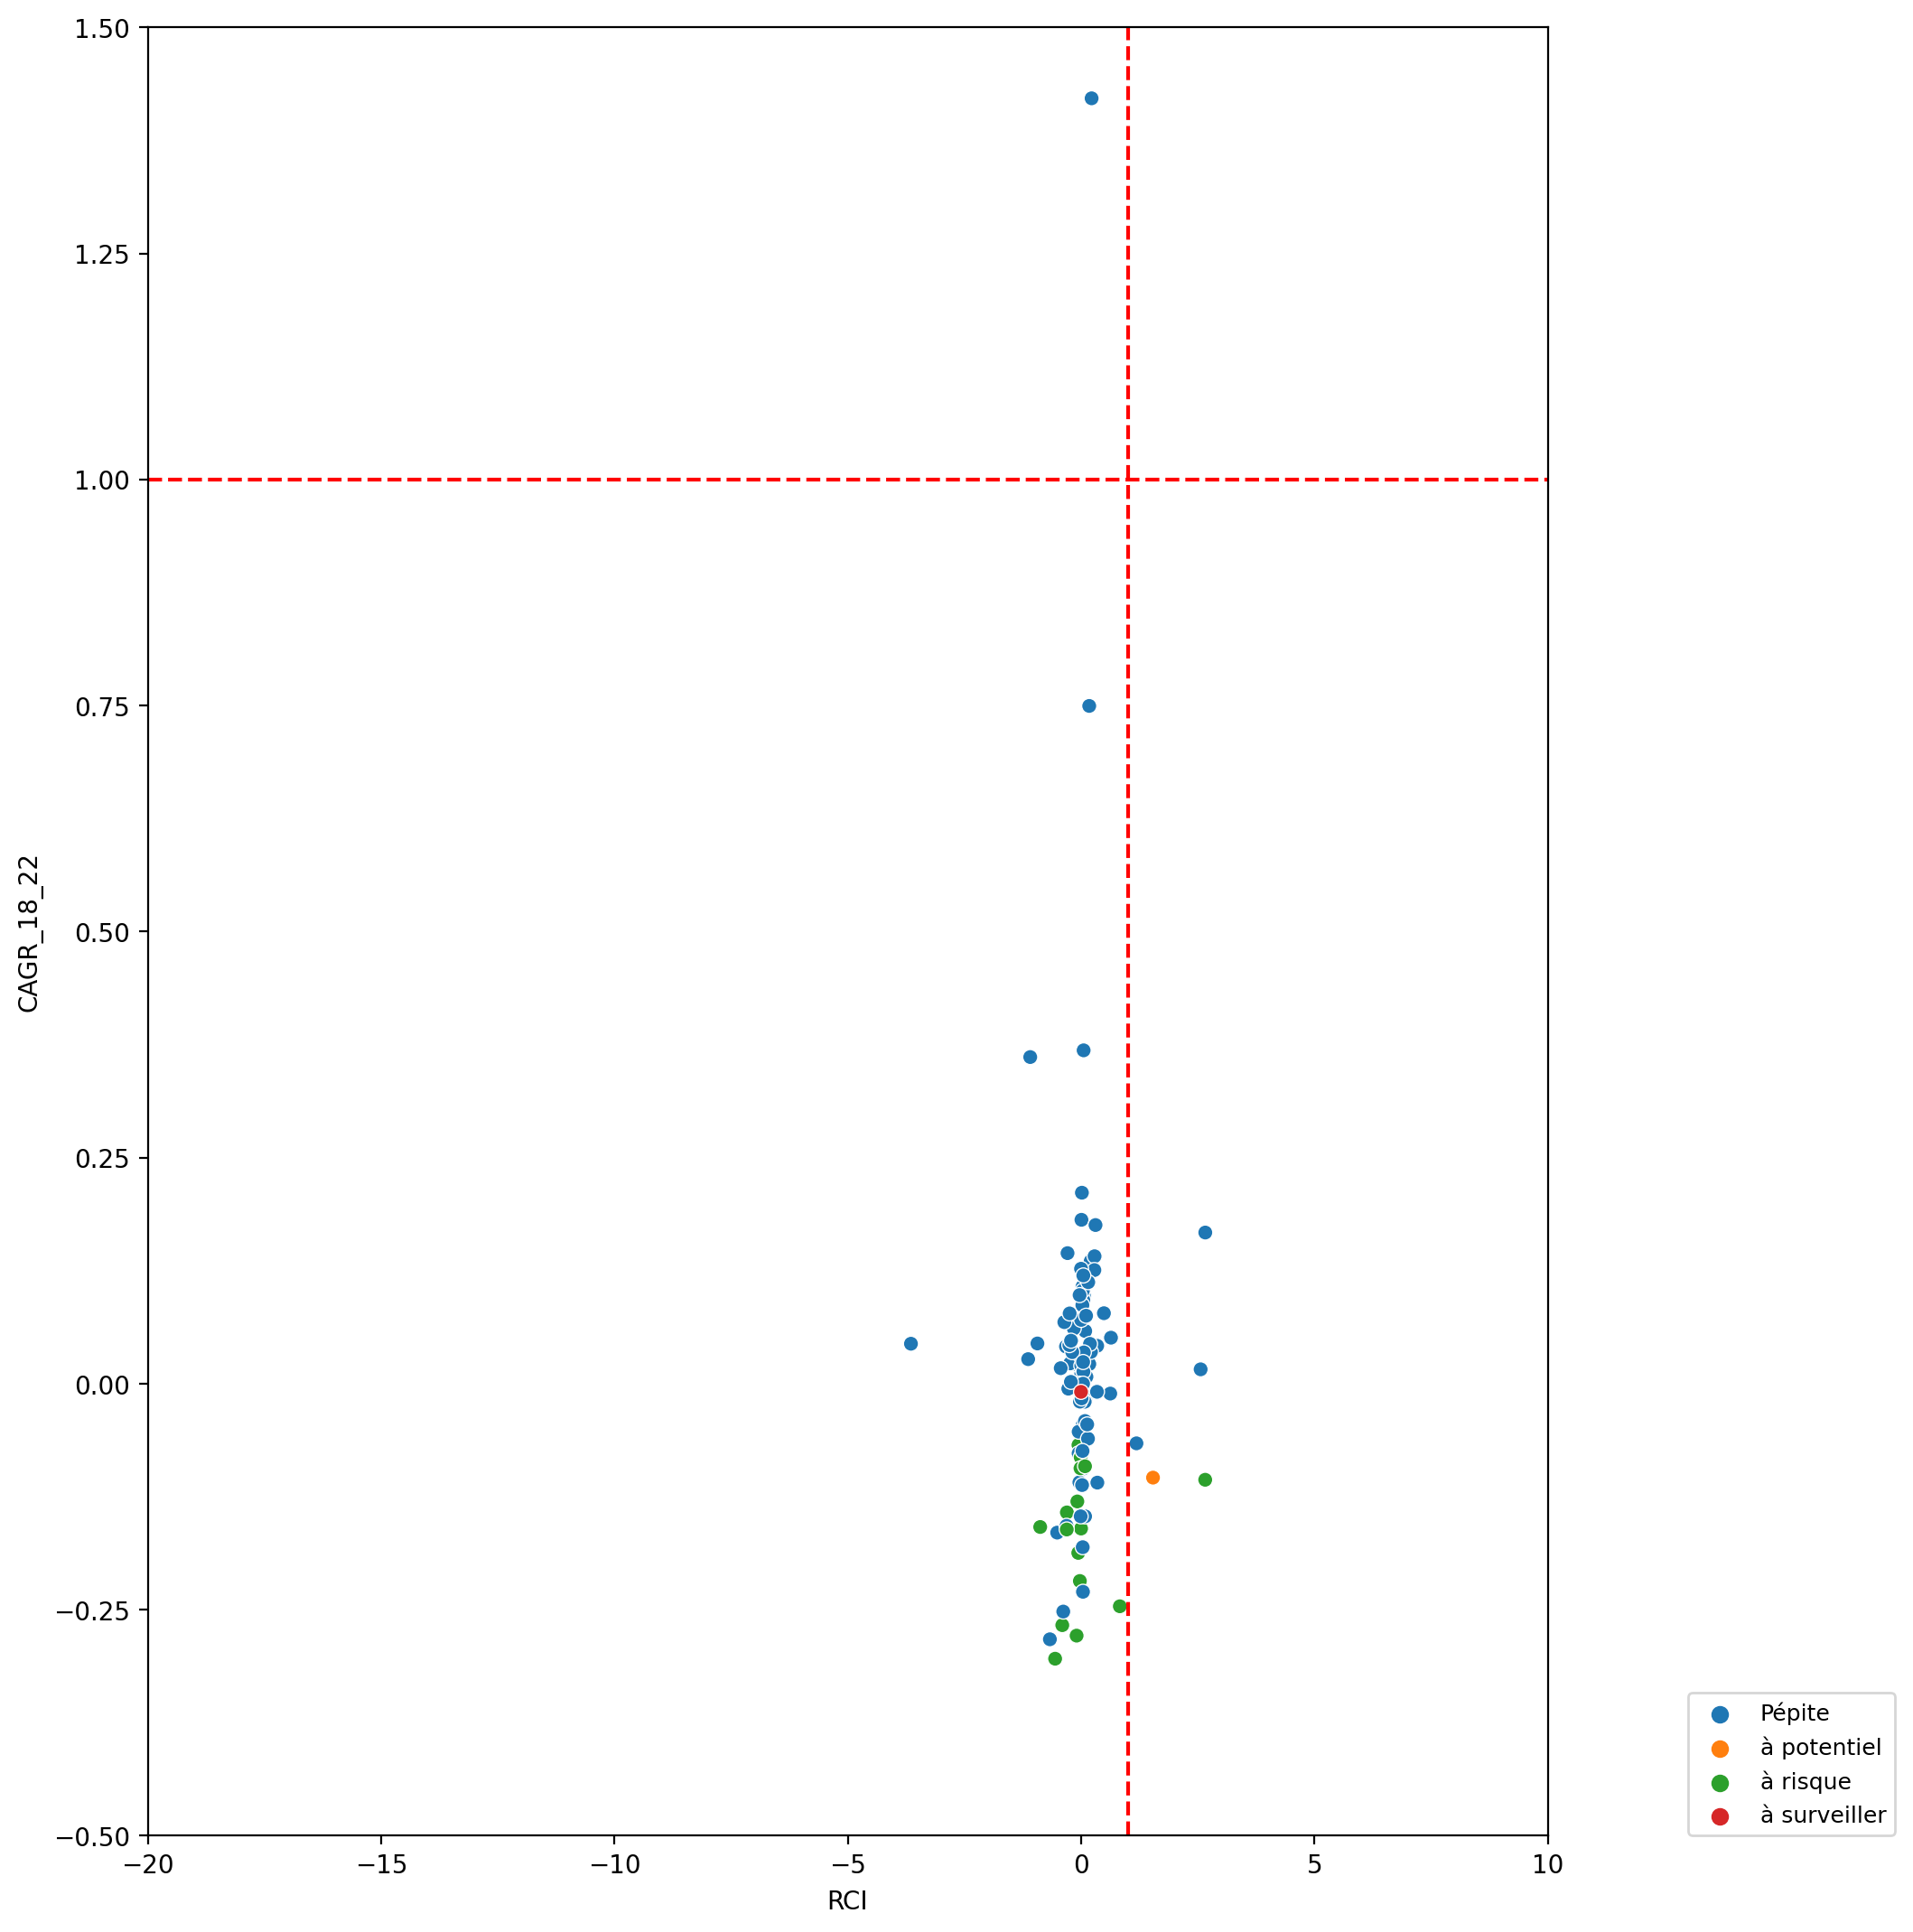

In [94]:
# nuage des entreprises de types PME 
plt.figure(figsize=(10,13),dpi=200)
ax=sns.scatterplot(x='RCI',y='CAGR_18_22',data=source_portfolio_classifié,hue='Prediction')
# La méthode legend() est appelée sur l'objet ax (qui représente les axes du graphique). 
# L'argument loc=(1.1, 0.5) spécifie l'emplacement de la légende par rapport au cadre du graphique, 
# où 1.1 décale la légende à droite du graphique (1 étant juste à la limite droite) 
# et 0.5 positionne la légende au milieu sur l'axe vertical.

ax.axvline(x=1, color='red', linestyle='--')
ax.set_xlim(-20,10)
ax.set_ylim(-0.5,1.5)
ax.axhline(y=1, color='red', linestyle='--')
ax.legend(loc=(1.1,0),fontsize=9)

In [95]:
pot_source_portfolio_classifié = source_portfolio_classifié[(source_portfolio_classifié['Prediction']=='Pépite') | (source_portfolio_classifié['Prediction']== 'à potentiel')]

In [96]:
pot_source_portfolio_classifié[['siren','company_name', 'revenue','RCI','CAGR_18_22','Prediction']]

,siren,company_name,revenue,RCI,CAGR_18_22,Prediction
30,492677539.0,BTF CONSULTING,53585026.5,0.026071,0.007047,Pépite
54,388301988.0,ESLC SERVICES,170671282.0,0.005587,0.010962,Pépite
80,553750407.0,COSTAMAGNA DISTRIBUTION,76405831.0,0.345741,0.041908,Pépite
81,553750407.0,COSTAMAGNA DISTRIBUTION,76405831.0,0.345741,0.041908,Pépite
232,306140039.0,CAPELLI,34251800.0,0.055284,0.368703,Pépite
...,...,...,...,...,...,...
7262,326216132.0,ASSELIN,13345955.4,-0.214579,0.047551,Pépite
7340,381515857.0,MONTRE SERVICE,11103226.6,-0.007444,-0.146706,Pépite
7393,305823296.0,LABORATOIRES M&L,306065417.0,1.187876,-0.065964,Pépite
7405,955802061.0,COMPAGNIE MEDITERRANEENNE DES CAFES,104407657.0,0.341518,-0.008966,Pépite
